In [210]:
from keras.datasets import boston_housing
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
np.load = np_load_old

In [211]:
X_train.shape

(404, 13)

In [212]:
X_test.shape

(102, 13)

In [213]:
y_train.shape

(404,)

In [214]:
y_test.shape

(102,)

Build a multilayer neural network. Compile with these options. optimizer='rmsprop', loss='mse'

In [215]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='linear'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=32, epochs=100, validation_split=0.2)



Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 2s 7ms/step - loss: 292.9484 - acc: 0.0062 - val_loss: 87.1977 - val_acc: 0.0247
Epoch 2/100
323/323 [==============================] - 0s 141us/step - loss: 76.8374 - acc: 0.0062 - val_loss: 80.8080 - val_acc: 0.0123
Epoch 3/100
323/323 [==============================] - 0s 148us/step - loss: 66.0604 - acc: 0.0000e+00 - val_loss: 120.6485 - val_acc: 0.0123
Epoch 4/100
323/323 [==============================] - 0s 142us/step - loss: 120.4990 - acc: 0.0062 - val_loss: 68.3872 - val_acc: 0.0123
Epoch 5/100
323/323 [==============================] - 0s 130us/step - loss: 73.9255 - acc: 0.0000e+00 - val_loss: 307.7940 - val_acc: 0.0000e+00
Epoch 6/100
323/323 [==============================] - 0s 124us/step - loss: 101.7974 - acc: 0.0000e+00 - val_loss: 88.0619 - val_acc: 0.0123
Epoch 7/100
323/323 [==============================] - 0s 139us/step - loss: 73.8091 - acc: 0.0062 - val_loss: 70.

Show a MSE loss

In [216]:
results = model.evaluate(X_test, y_test)
results

102/102 [==============================] - 0s 108us/step


[30.823872285730697, 0.00980392156862745]

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\envs\\551\\lib\\site-packages\\matplotlib\\pyplot.py'>

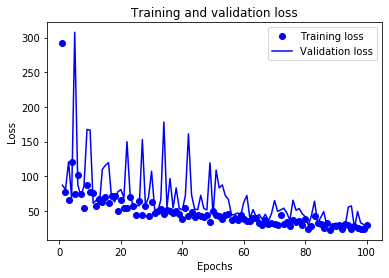

In [217]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\envs\\551\\lib\\site-packages\\matplotlib\\pyplot.py'>

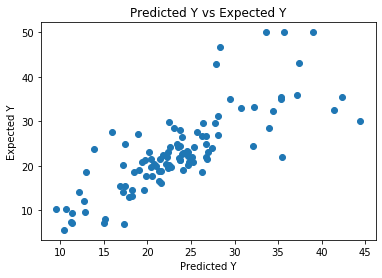

In [218]:
y_pred = model.predict(X_test)
plt.scatter(y_pred, y_test)
plt.title('Predicted Y vs Expected Y')
plt.xlabel('Predicted Y')
plt.ylabel('Expected Y')

plt